In [2]:
import numpy as np
import seaborn as sb
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf



import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from pmdarima.arima import AutoARIMA



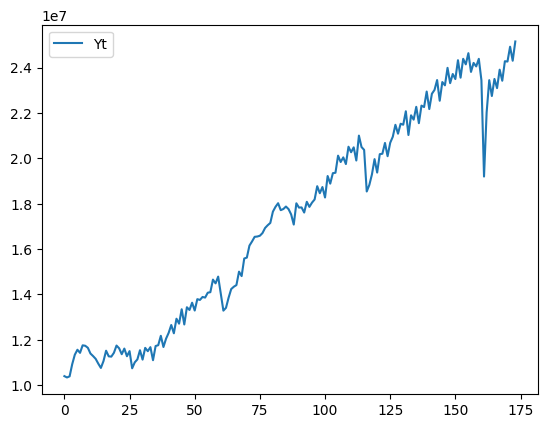

In [11]:
#series_data = read_csv('./pib.csv', header=0, index_col=0)
series_data = read_csv('./pib.csv', header=0)
series_data.plot()
pyplot.show()


<Axes: >

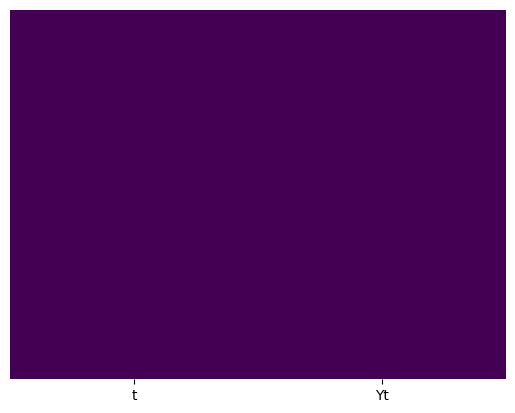

In [12]:

series_data.head()
sns.heatmap(series_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [13]:
#Make sure there are no null values
series_data.isnull().value_counts()
#Check the datatypes
print(series_data.dtypes)


t      object
Yt    float64
dtype: object


In [10]:

series_data.describe()

,Yt
count,1.740000e+02
mean,1.730707e+07
std,4.598416e+06
min,1.034235e+07
25%,1.268699e+07
50%,1.779611e+07
75%,2.137741e+07
max,2.514677e+07


In [14]:
series_data.head()

,t,Yt
0,1980/01,1.040137e+07
1,1980/02,1.034235e+07
2,1980/03,1.039273e+07
3,1980/04,1.092767e+07
4,1981/01,1.134585e+07


In [15]:
#Convert the month column to datetime
pd.to_datetime(series_data['t'])




0     1980-01-01
1     1980-02-01
2     1980-03-01
3     1980-04-01
4     1981-01-01
         ...    
169   2022-02-01
170   2022-03-01
171   2022-04-01
172   2023-01-01
173   2023-02-01
Name: t, Length: 174, dtype: datetime64[ns]

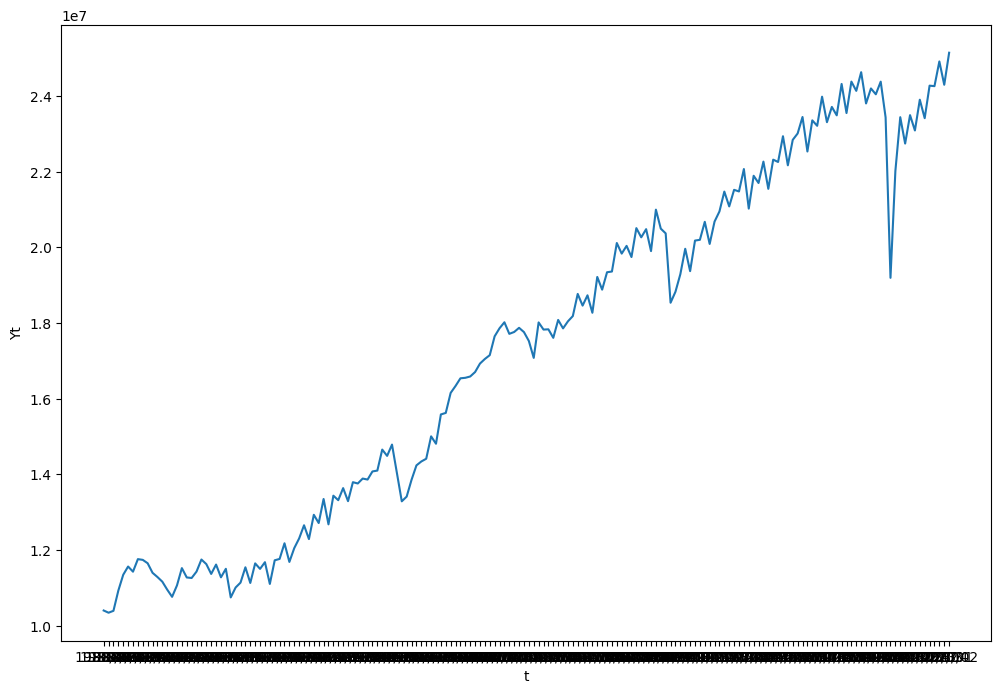

In [16]:
plt.figure(figsize=(12,8))
sns.lineplot(data=series_data, x='t', y= 'Yt')
#Set the index of the Month
series_data.set_index('t',inplace=True)

In [17]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(series_data)



(0.058857312679521795, True)

Text(0, 0.5, 'yt')

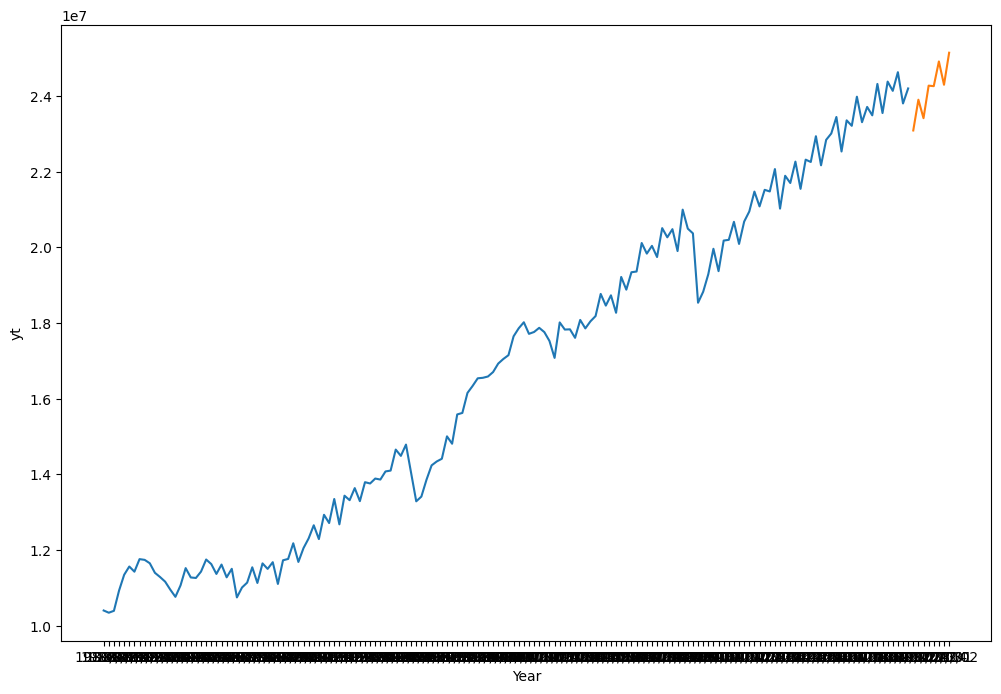

In [18]:

#Spliting the dataset into train and test
train = series_data[:158]
test = series_data[-8:]

train.tail()
test.head()
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.xlabel('Year')
plt.ylabel('yt')



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=4549.033, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=4524.921, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=4526.927, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=4552.486, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=4543.317, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=4522.177, Time=0.05 sec
 ARIMA(1,1,0)(3,0,0)[4] intercept   : AIC=4522.005, Time=0.23 sec
 ARIMA(1,1,0)(4,0,0)[4] intercept   : AIC=4517.974, Time=0.64 sec
 ARIMA(1,1,0)(5,0,0)[4] intercept   : AIC=4517.996, Time=0.29 sec
 ARIMA(1,1,0)(4,0,1)[4] intercept   : AIC=4518.506, Time=0.49 sec
 ARIMA(1,1,0)(3,0,1)[4] intercept   : AIC=4521.914, Time=0.44 sec
 ARIMA(1,1,0)(5,0,1)[4] intercept   : AIC=4514.347, Time=0.87 sec
 ARIMA(1,1,0)(5,0,2)[4] intercept   : AIC=4516.129, Time=2.07 sec
 ARIMA(1,1,0)(4,0,2)[4] intercept   : AIC=4519.767, Time=0.83 sec
 ARIMA(0,1,0)(5,0,1)[4] intercept

ValueError: 'Left corner' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

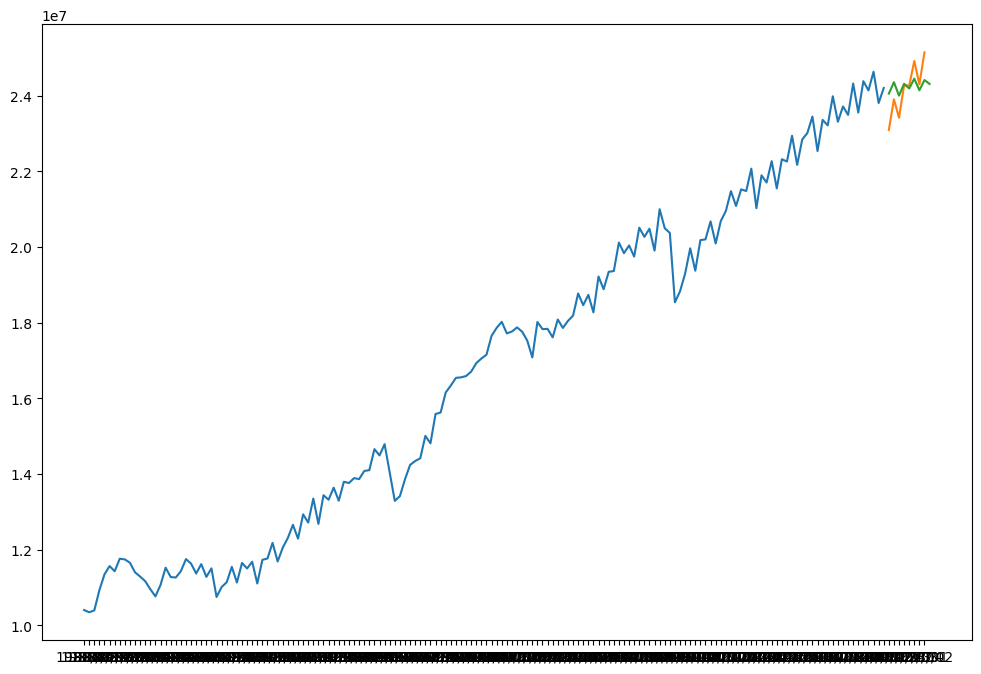

In [19]:

arima_model =  auto_arima(train,start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=4, seasonal=True,
                          error_action='ignore',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
AutoARIMA()

arima_model.summary()
prediction = pd.DataFrame(arima_model.predict(n_periods = 9))
prediction.columns = ['predicted_yt']
prediction

plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

arima_model.plot_diagnostics(figsize=(14,10))

from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])